<a href="https://colab.research.google.com/github/PINKIREKHA/Driver_churn_prediction/blob/main/OLA_Driver_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


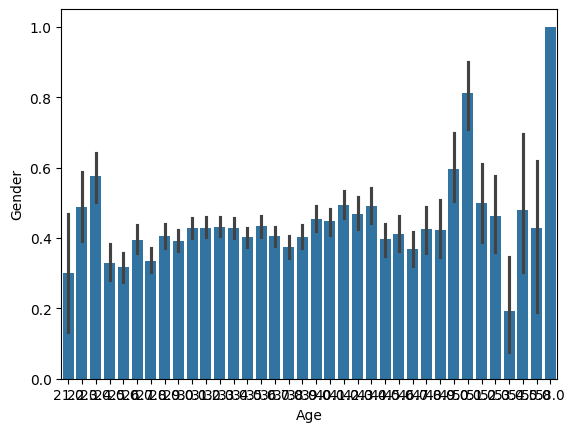

In [ ]:
# prompt: plot a graph between age and gender

sns.barplot(x = 'Age', y = 'Gender', data = df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
# Here unnammed is not required hecne dropping it
df.drop("Unnamed: 0" , inplace = True , axis = 1)

In [ ]:
# convert the date columns to date time format
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])


In [ ]:
df["LastWorkingDate	"] = pd.to_datetime(df["LastWorkingDate"])

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate\t
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,NaT
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,NaT
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2,2019-03-11
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1,NaT
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1,NaT


### DATA PREPROCESSING  - HANDLING MISSING VALUES

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
LastWorkingDate\t       17488
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
# remove gender from num_cols

num_cols = num_cols.drop('Gender')


In [ ]:
# perform knn imputation on numerical columns

from sklearn.impute import KNNImputer

# Define the KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in numerical columns
df[num_cols] = imputer.fit_transform(df[num_cols])

# Check for missing values again
df.isna().sum()


MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
LastWorkingDate\t       17488
dtype: int64

In [ ]:
# fill gender with mode

df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
LastWorkingDate\t       17488
dtype: int64

In [ ]:
df["LastWorkingDate"].nunique()

493

In [ ]:
df["LastWorkingDate\t"].nunique()

493

In [ ]:
# here the columns lastworkingdate a d lastworkingdate\t are same hence can drop one of them
df.drop("LastWorkingDate\t" , inplace = True , axis = 1)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,2381060.0,2.0
1,2019-02-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,-665480.0,2.0
2,2019-03-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,03/11/19,1.0,1.0,0.0,2.0
3,2020-11-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0
4,2020-12-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0


In [ ]:
df.shape

(19104, 13)

0.0    11126
1.0     7978
Name: Gender, dtype: int64

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### UNIVARIATE ANALYSIS

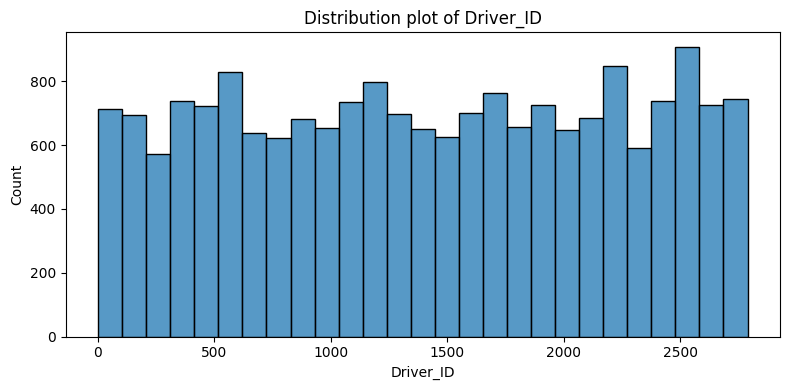

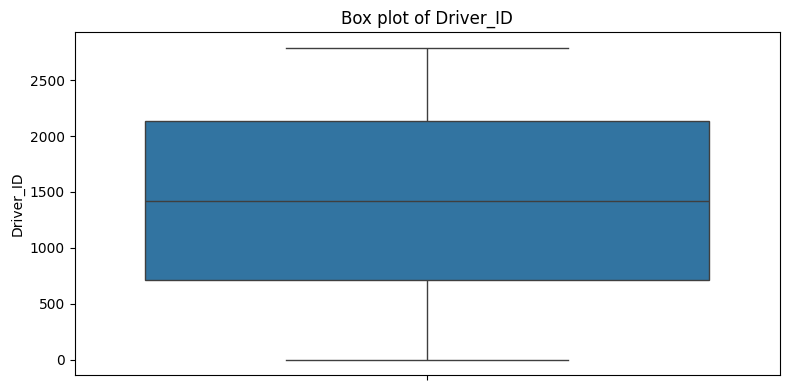

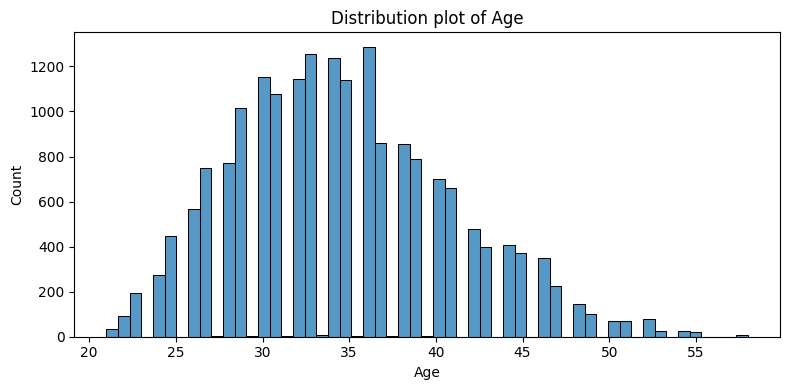

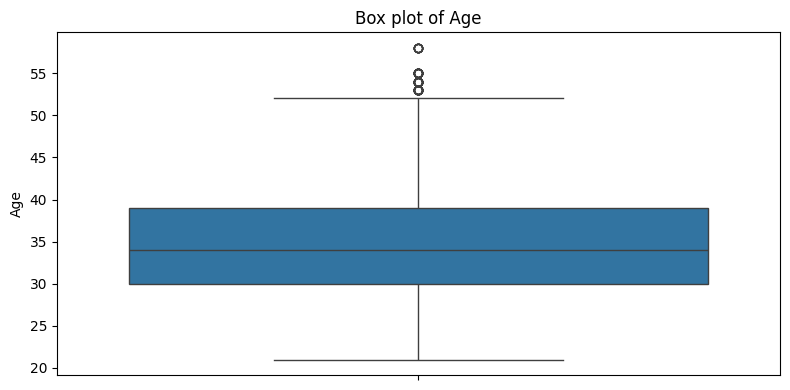

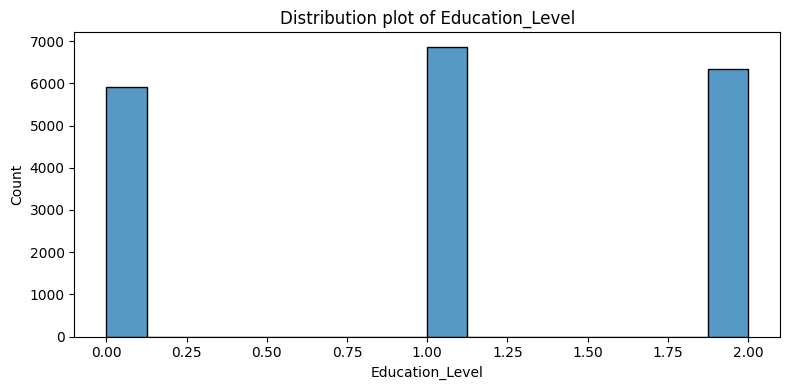

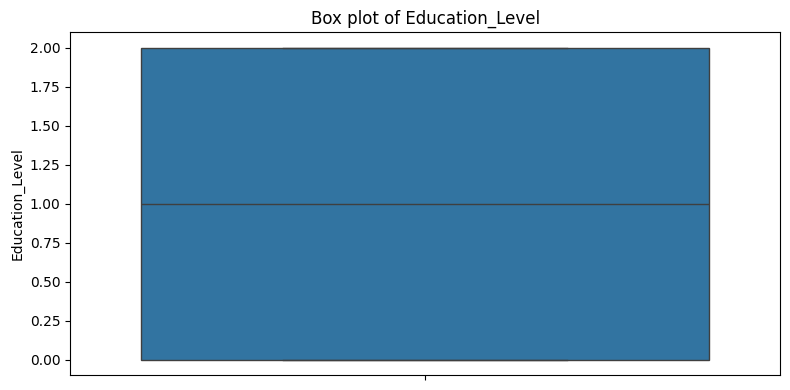

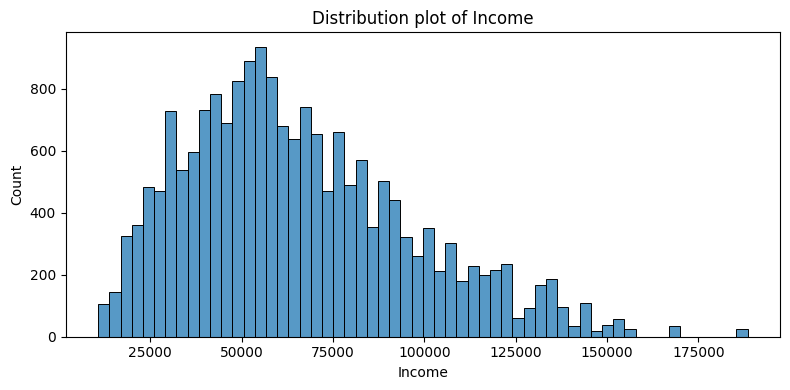

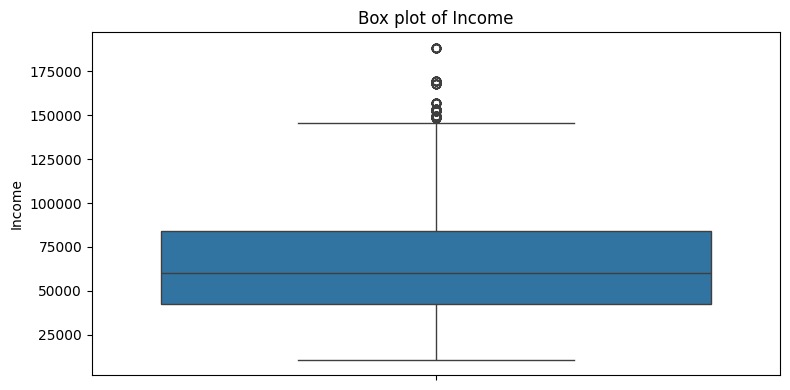

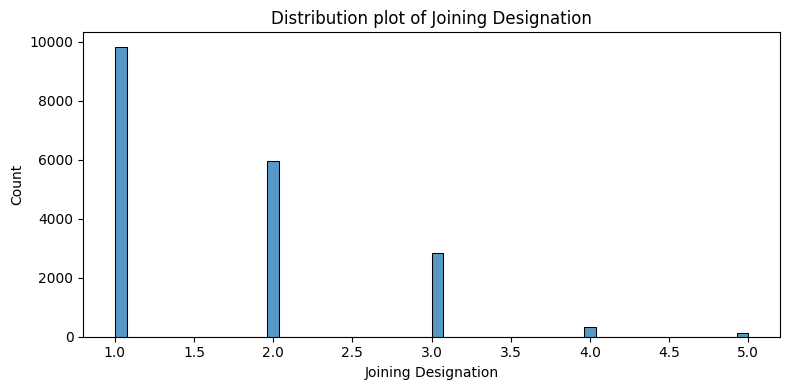

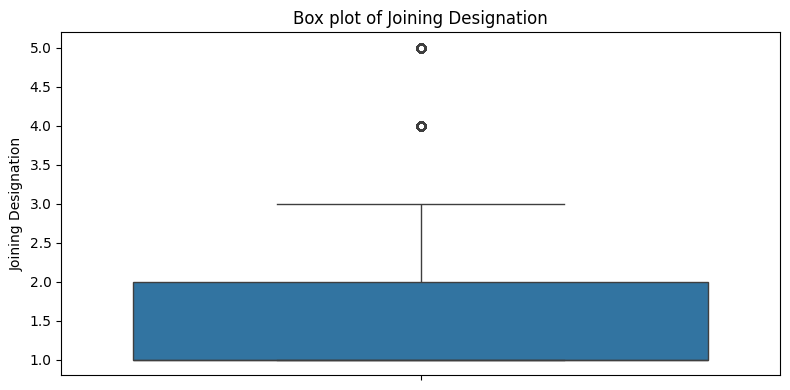

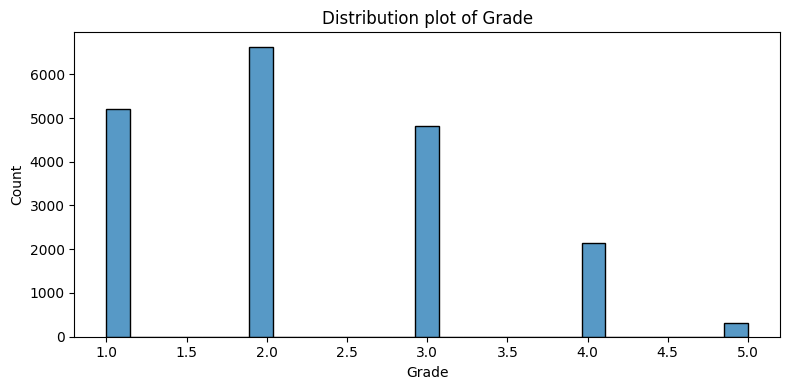

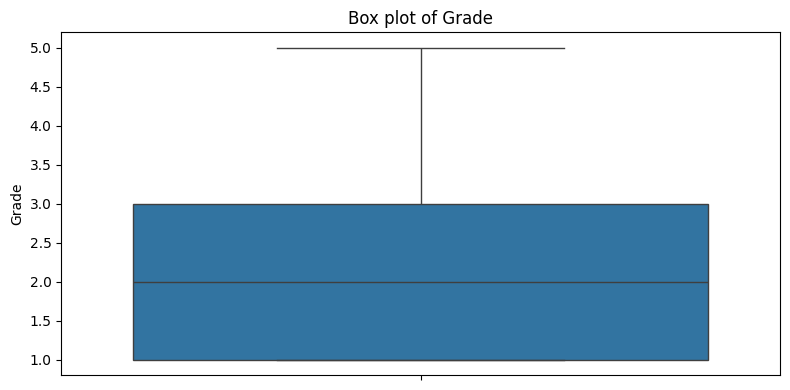

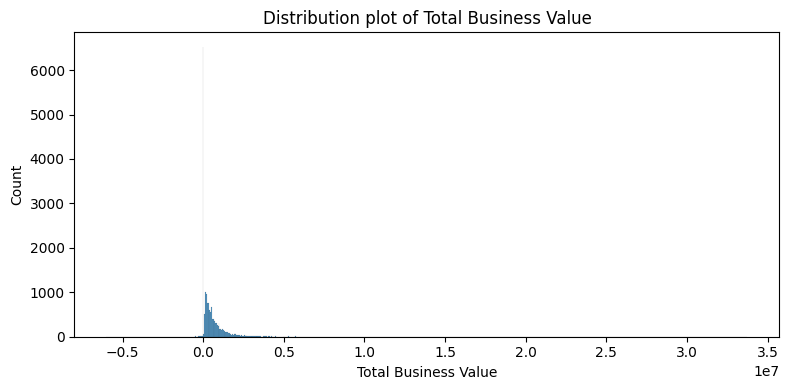

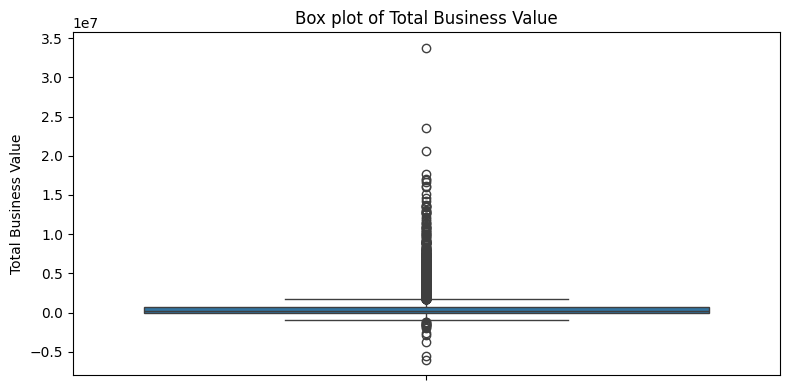

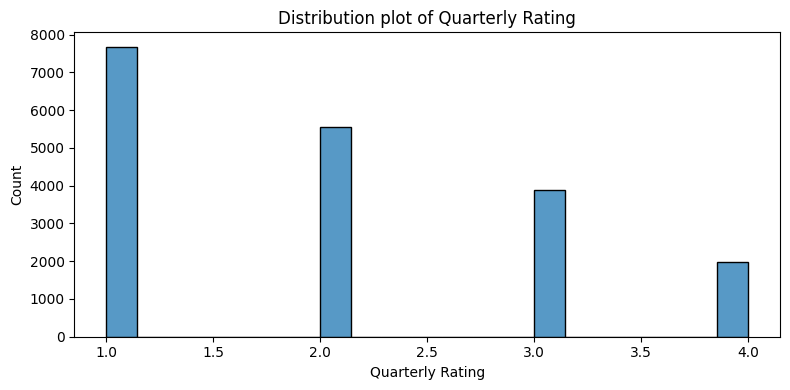

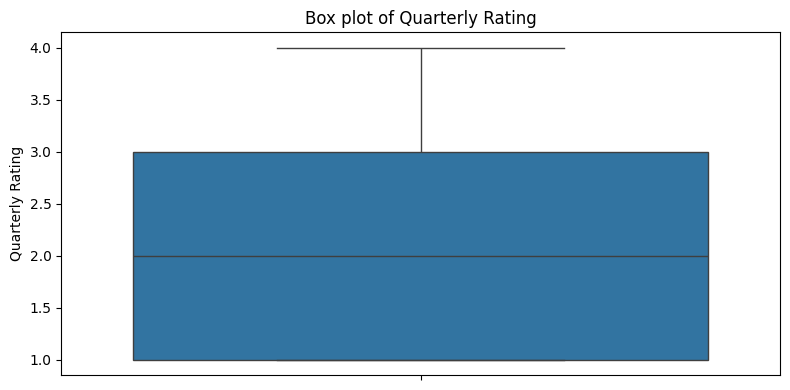

In [ ]:
# plot distribution plots and box plots for num_cols

for col in num_cols:
  # Distribution plot
  plt.figure(figsize=(8, 4))
  sns.histplot(df[col])
  plt.title(f"Distribution plot of {col}")
  plt.tight_layout()
  plt.show()

  # Box plot
  plt.figure(figsize=(8, 4))
  sns.boxplot(df[col])
  plt.title(f"Box plot of {col}")
  plt.tight_layout()
  plt.show()


<Axes: xlabel='Gender', ylabel='count'>

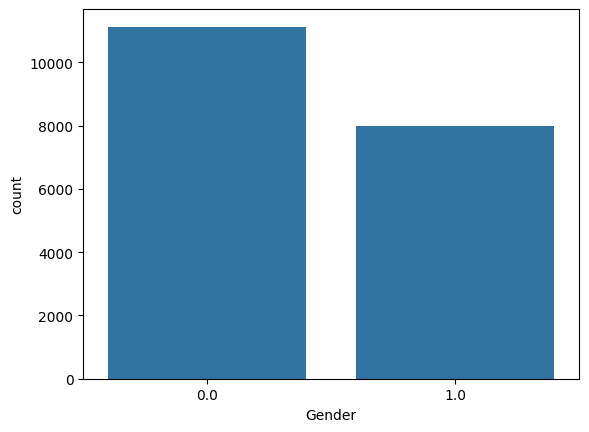

In [ ]:
sns.countplot(x = df["Gender"])

### BIVARIATE ANALYSIS

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,2381060.0,2.0
1,2019-02-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,-665480.0,2.0
2,2019-03-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,03/11/19,1.0,1.0,0.0,2.0
3,2020-11-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0
4,2020-12-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0


### BIVARIATE ANALYSIS

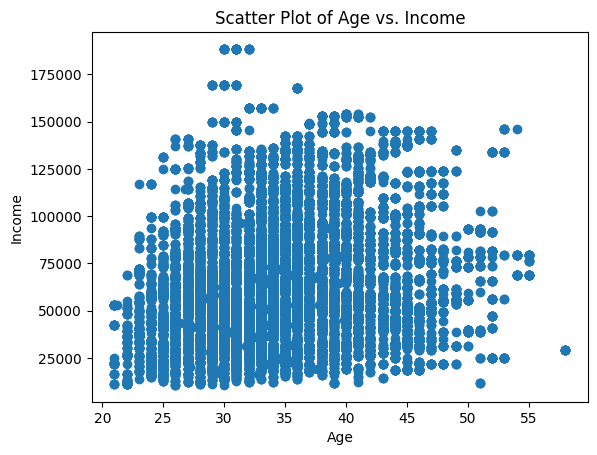

Text(0, 0.5, 'Average')

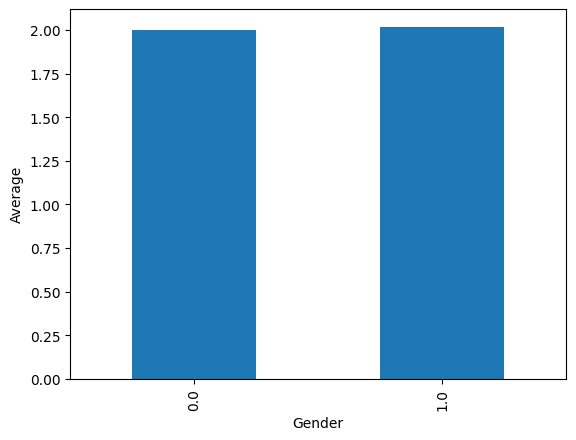

In [ ]:
# Using dataframe df: perform bivariate analysis
# Create a scatter plot of Age vs. Income
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()

# Create a bar chart of Gender vs. Quarterly Rating
df.groupby('Gender')['Quarterly Rating'].mean().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average')

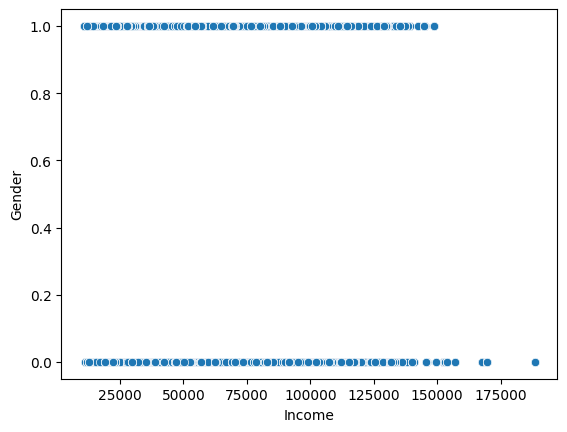

In [ ]:
#  PLOT GENDER VS INCOME

sns.scatterplot(data = df , x = "Income" , y = "Gender")
plt.show()


<Axes: xlabel='Quarterly Rating', ylabel='Income'>

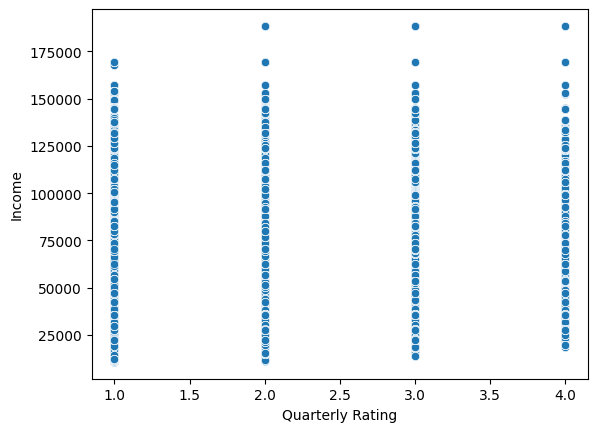

In [ ]:
sns.scatterplot(data = df, x = "Quarterly Rating" , y = "Income")

<Axes: xlabel='Gender', ylabel='Total Business Value'>

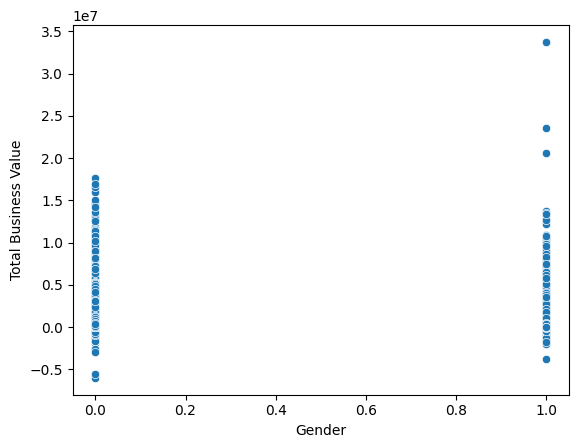

In [ ]:
sns.scatterplot(data = df, x = "Gender" , y = "Total Business Value")

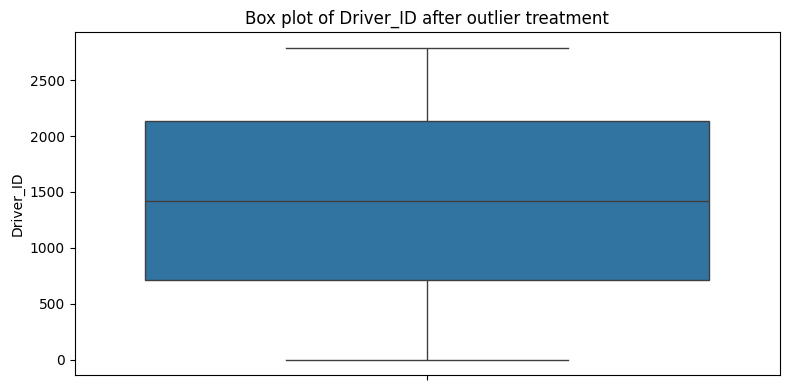

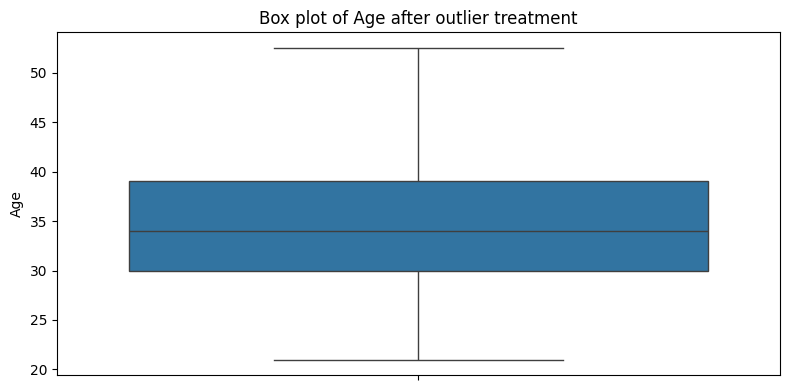

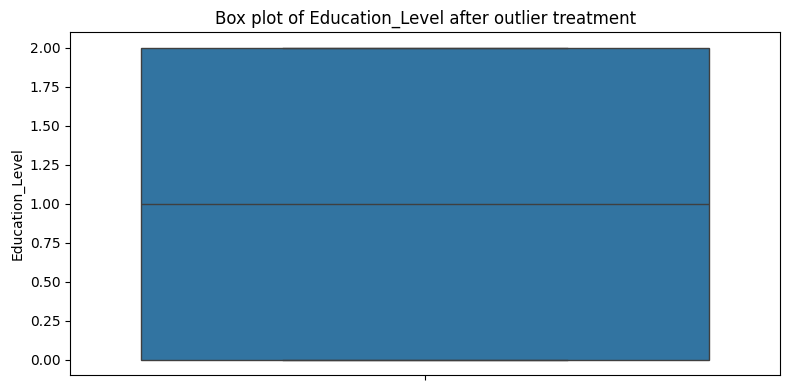

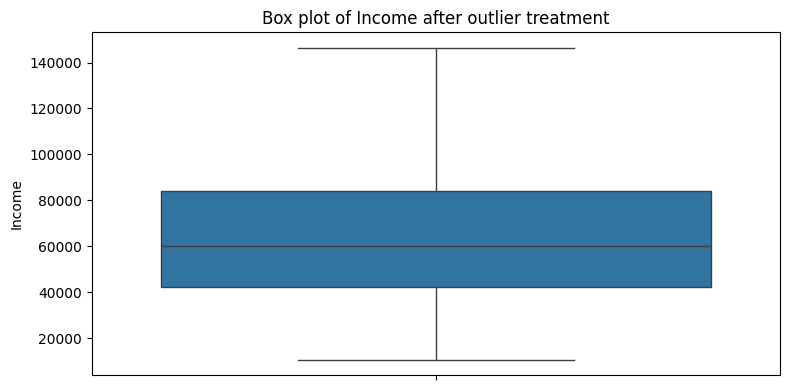

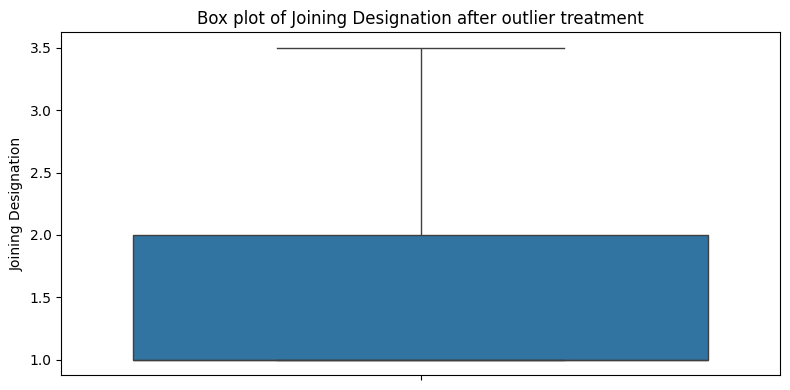

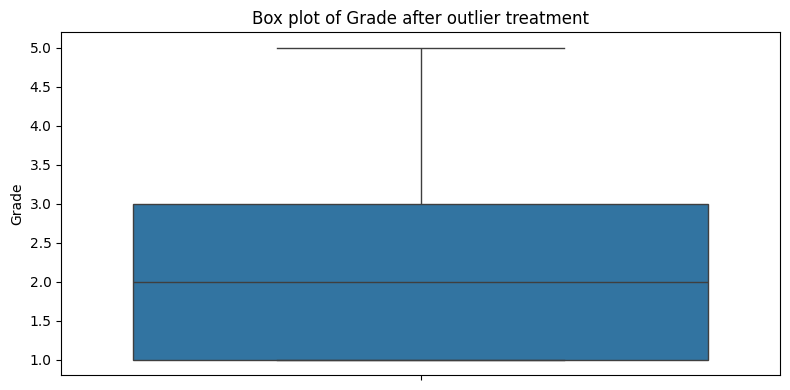

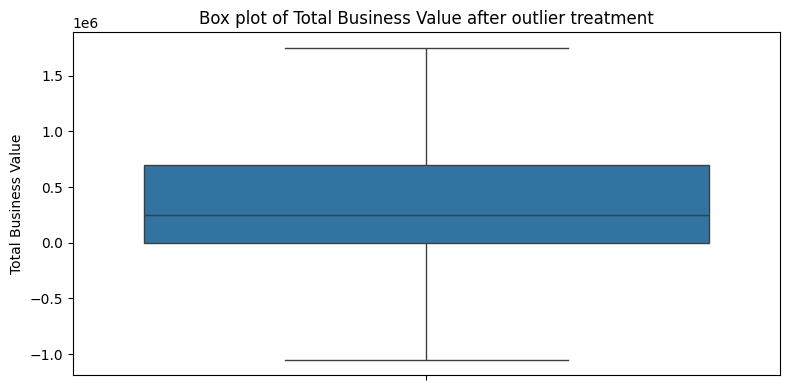

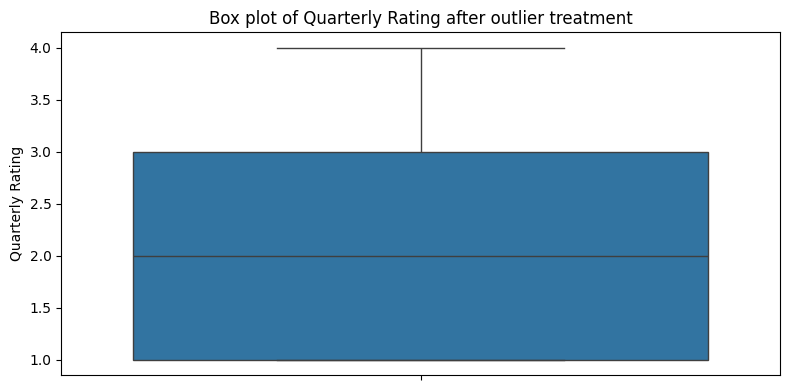

In [ ]:

# Define outlier replacement function
def replace_outliers(df, col, k=1.5):
    # Calculate interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Replace outliers with bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment to numerical columns
for col in num_cols:
    replace_outliers(df, col)

# Check for outliers again
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col} after outlier treatment")
    plt.tight_layout()
    plt.show()


In [ ]:
df.shape

(19104, 13)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,1749250.0,2.0
1,2019-02-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaN,1.0,1.0,-665480.0,2.0
2,2019-03-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,03/11/19,1.0,1.0,0.0,2.0
3,2020-11-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0
4,2020-12-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaN,2.0,2.0,0.0,1.0


In [ ]:
df["City"].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [ ]:
df["Education_Level"].value_counts()

1.0    6864
2.0    6327
0.0    5913
Name: Education_Level, dtype: int64

Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

In [ ]:
df["Driver_ID"].nunique()

2381

In [ ]:
df["Driver_ID"]

0           1.0
1           1.0
2           1.0
3           2.0
4           2.0
          ...  
19099    2788.0
19100    2788.0
19101    2788.0
19102    2788.0
19103    2788.0
Name: Driver_ID, Length: 19104, dtype: float64

In [ ]:
#  Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

df = df.groupby('Driver_ID').agg(
    Age=('Age', 'mean'),
    Gender=('Gender', 'first'),
    City=('City', 'first'),
    Income=('Income', 'mean'),
    Quarterly_Rating=('Quarterly Rating', 'mean'),
    Education_Level=('Education_Level', 'first'),
    Dateofjoining=('Dateofjoining', 'first'),
    LastWorkingDate=('LastWorkingDate', 'first')
).reset_index()


In [ ]:
df.head()

,Driver_ID,Gender,City,Income,Quarterly_Rating,Education_Level,Dateofjoining,LastWorkingDate,Age_Group
0,1.0,0.0,C23,57387.0,2.0,2.0,2018-12-24,1,21-30
1,2.0,0.0,C7,67016.0,1.0,2.0,2020-11-06,1,31-40
2,4.0,0.0,C13,65603.0,1.0,2.0,2019-12-07,1,41-50
3,5.0,0.0,C9,46368.0,1.0,0.0,2019-01-09,1,21-30
4,6.0,1.0,C11,78728.0,1.6,1.0,2020-07-31,1,31-40


In [ ]:
# Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

df['Increased_Rating'] = np.where(df['Quarterly_Rating'] > df.groupby('Driver_ID')['Quarterly_Rating'].shift(1), 1, 0)


FEATURE ENGINEERING

In [ ]:
# here drivers who are still working can have last working date as null
# drivers who already left has the last working date.
# so we can encode the last working date as 1 if driver has left and 0 if driver has no last working date

In [ ]:
# encode the last working date if not null as 1 else 0

df['last_working_day_present'] = df['LastWorkingDate'].apply(lambda x: 1 if pd.notna(x) else 0)


In [ ]:
df["Age"].max()

52.5

In [ ]:
#minimum age is 21 and maximum 52.5
#  binnig the age column
bins = [21, 30, 40, 50, 60]
labels = ['21-30', '31-40', '41-50', '51-60']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()


,Driver_ID,Age,Gender,City,Income,Quarterly_Rating,Education_Level,Dateofjoining,LastWorkingDate,Increased_Rating,last_working_day_present,Age_Group
0,1.0,28.0,0.0,C23,57387.0,2.0,2.0,2018-12-24,03/11/19,0,1,21-30
1,2.0,31.0,0.0,C7,67016.0,1.0,2.0,2020-11-06,None,0,0,31-40
2,4.0,43.0,0.0,C13,65603.0,1.0,2.0,2019-12-07,27/04/20,0,1,41-50
3,5.0,29.0,0.0,C9,46368.0,1.0,0.0,2019-01-09,03/07/19,0,1,21-30
4,6.0,31.0,1.0,C11,78728.0,1.6,1.0,2020-07-31,None,0,0,31-40


In [ ]:
# as we have binned hence can now drop the age column
df.drop("Age",axis = 1 , inplace = True)

In [ ]:
df.head()

,Driver_ID,Gender,City,Income,Quarterly_Rating,Education_Level,Dateofjoining,LastWorkingDate,Increased_Rating,last_working_day_present,Age_Group
0,1.0,0.0,C23,57387.0,2.0,2.0,2018-12-24,03/11/19,0,1,21-30
1,2.0,0.0,C7,67016.0,1.0,2.0,2020-11-06,None,0,0,31-40
2,4.0,0.0,C13,65603.0,1.0,2.0,2019-12-07,27/04/20,0,1,41-50
3,5.0,0.0,C9,46368.0,1.0,0.0,2019-01-09,03/07/19,0,1,21-30
4,6.0,1.0,C11,78728.0,1.6,1.0,2020-07-31,None,0,0,31-40


In [ ]:
# plotting age and last working date
df["last_working_day_present"]

0       1
1       1
2       1
3       1
4       1
       ..
2376    1
2377    1
2378    1
2379    1
2380    1
Name: LastWorkingDate, Length: 2381, dtype: int64

In [ ]:
df["last_working_day_present"].value_counts()

1    1616
0     765
Name: last_working_day_present, dtype: int64

In [ ]:
df.drop("LastWorkingDate", axis = 1 , inplace = True)

KeyError: "['LastWorkingDate'] not found in axis"

In [ ]:
df["Age_Group"].value_counts()

31-40    1296
21-30     765
41-50     298
51-60      20
Name: Age_Group, dtype: int64

<Axes: xlabel='last_working_day_present,Age_Group'>

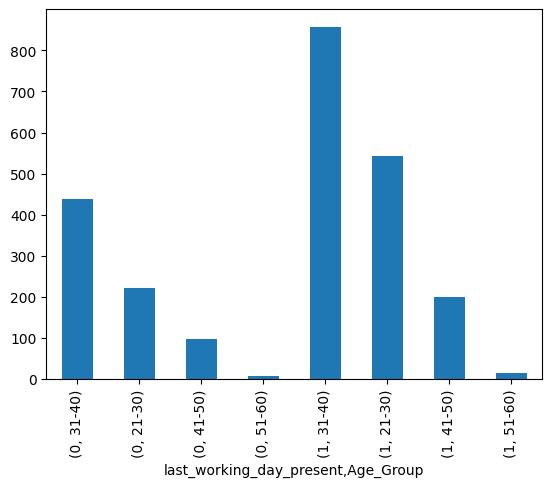

In [ ]:
df.groupby("last_working_day_present")["Age_Group"].value_counts().plot(kind = "bar")

In [ ]:
df.drop("Driver_ID", axis = 1 , inplace = True)

In [ ]:
#  Using dataframe df: label encoder for City

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df


,Gender,City,Income,Quarterly_Rating,Education_Level,Dateofjoining,Increased_Rating,last_working_day_present,Age_Group
0,0.0,15,57387.0,2.000000,2.0,2018-12-24,0,1,0
1,0.0,26,67016.0,1.000000,2.0,2020-11-06,0,0,1
2,0.0,4,65603.0,1.000000,2.0,2019-12-07,0,1,2
3,0.0,28,46368.0,1.000000,0.0,2019-01-09,0,1,0
4,1.0,2,78728.0,1.600000,1.0,2020-07-31,0,0,1
...,...,...,...,...,...,...,...,...,...
2376,0.0,16,82815.0,2.625000,0.0,2015-10-15,0,0,1
2377,1.0,28,12105.0,1.000000,0.0,2020-08-28,0,1,1
2378,0.0,10,35370.0,1.666667,0.0,2018-07-31,0,1,2
2379,1.0,12,69498.0,1.500000,2.0,2018-07-21,0,1,0


In [ ]:
#  extract month and year from date of joining and make 2 separate columns

df['month_join'] = df['Dateofjoining'].dt.month
df['year_join'] = df['Dateofjoining'].dt.year
df.head()


,Gender,City,Income,Quarterly_Rating,Education_Level,Dateofjoining,Increased_Rating,last_working_day_present,Age_Group,month_join,year_join
0,0.0,15,57387.0,2.0,2.0,2018-12-24,0,1,0,12,2018
1,0.0,26,67016.0,1.0,2.0,2020-11-06,0,0,1,11,2020
2,0.0,4,65603.0,1.0,2.0,2019-12-07,0,1,2,12,2019
3,0.0,28,46368.0,1.0,0.0,2019-01-09,0,1,0,1,2019
4,1.0,2,78728.0,1.6,1.0,2020-07-31,0,0,1,7,2020


In [ ]:
df.drop("Dateofjoining" , inplace = True , axis = 1)


In [ ]:
df.head()

,Driver_ID,Gender,City,Income,Quarterly_Rating,Education_Level,working_or_not,Age_Group,month_join,year_join
0,1.0,0.0,15,57387.0,2.0,2.0,0,21-30,12,2018
1,2.0,0.0,26,67016.0,1.0,2.0,1,31-40,11,2020
2,4.0,0.0,4,65603.0,1.0,2.0,0,41-50,12,2019
3,5.0,0.0,28,46368.0,1.0,0.0,0,21-30,1,2019
4,6.0,1.0,2,78728.0,1.6,1.0,1,31-40,7,2020


In [ ]:
# Using dataframe df: convert the age_group to label encoders
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age_Group'] = le.fit_transform(df['Age_Group'])
df.head()


,Gender,City,Income,Quarterly_Rating,Education_Level,Increased_Rating,last_working_day_present,Age_Group,month_join,year_join
0,0.0,15,57387.0,2.0,2.0,0,1,0,12,2018
1,0.0,26,67016.0,1.0,2.0,0,0,1,11,2020
2,0.0,4,65603.0,1.0,2.0,0,1,2,12,2019
3,0.0,28,46368.0,1.0,0.0,0,1,0,1,2019
4,1.0,2,78728.0,1.6,1.0,0,0,1,7,2020


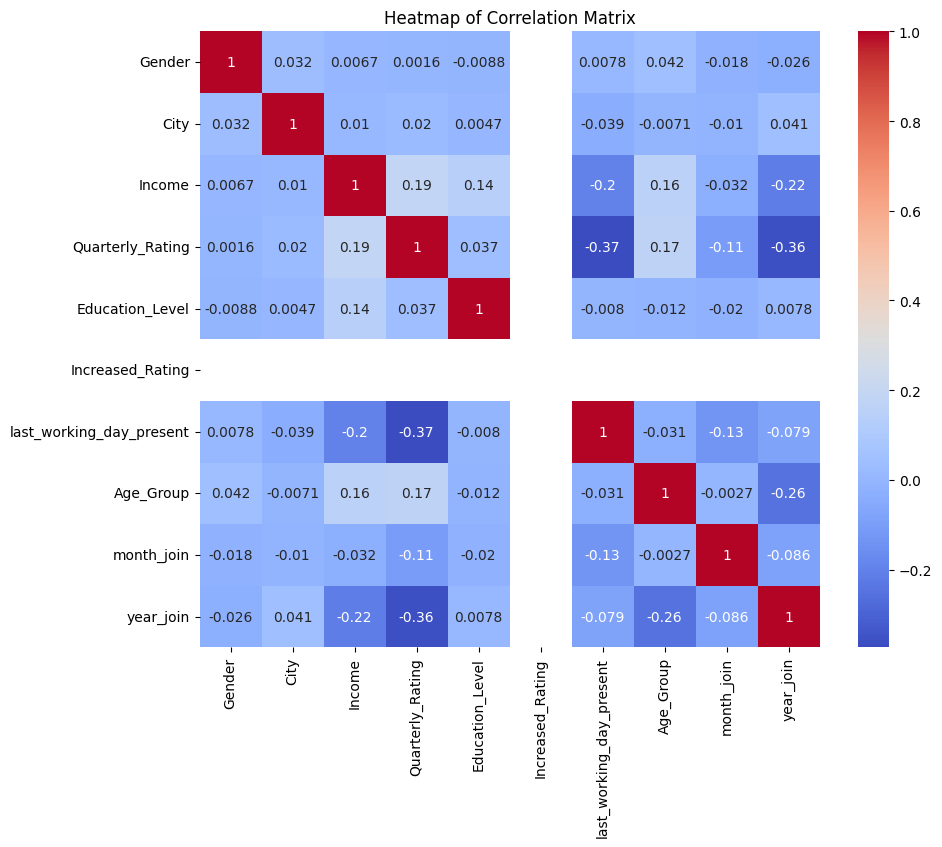

In [ ]:

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [ ]:
#check whether the dataset is imbalanced or not

df["last_working_day_present"].value_counts()

1    1616
0     765
Name: last_working_day_present, dtype: int64

In [ ]:
df.shape

(2381, 10)

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('last_working_day_present', axis=1)
y = df['last_working_day_present']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the train and test sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (1785, 9)
Shape of X_test: (596, 9)
Shape of y_train: (1785,)
Shape of y_test: (596,)


In [ ]:
# perform  standard scaler

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Working with an imbalanced dataset
from imblearn.over_sampling import SMOTE
# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print(f"Class distribution after oversampling: {y_train_resampled.value_counts()}")

Class distribution after oversampling: 1    1289
0    1289
Name: working_or_not, dtype: int64


In [ ]:
# perform ensemble model on df

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the individual models
model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
model3 = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
model4 = XGBClassifier(random_state=42)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('rf', model1), ('gbdt', model2), ('ada', model3)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)




Accuracy: 0.8422818791946308


In [ ]:
# print classification report
from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.79      0.70      0.74       193
           1       0.87      0.91      0.89       403

    accuracy                           0.84       596
   macro avg       0.83      0.81      0.81       596
weighted avg       0.84      0.84      0.84       596



In [ ]:
# do some hyper parameter tuning to improve accuracy

from sklearn.model_selection import GridSearchCV
# Define the model
model = RandomForestClassifier()
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy after hyperparameter tuning:', accuracy)

# Get the classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print(report)


Accuracy after hyperparameter tuning: 0.8489932885906041
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       193
           1       0.89      0.89      0.89       403

    accuracy                           0.85       596
   macro avg       0.83      0.83      0.83       596
weighted avg       0.85      0.85      0.85       596



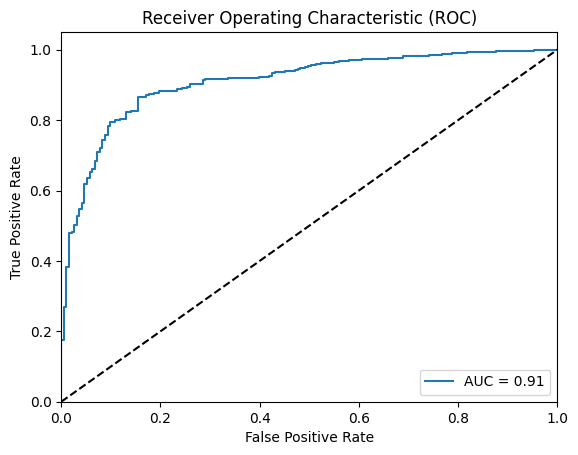

In [ ]:
# ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
